<a href="https://colab.research.google.com/github/Arnellou/ML-foundations-JohnKrohn-OREILLY-course-notebooks/blob/main/notebooks/2-linear-algebra-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning.

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*.

Over the course of studying this topic, you'll:

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning.
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms.
* Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal component analysis.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Review of Introductory Linear Algebra*

* Modern Linear Algebra Applications
* Tensors, Vectors, and Norms
* Matrix Multiplication
* Matrix Inversion
* Identity, Diagonal and Orthogonal Matrices

*Segment 2: Eigendecomposition*

* Affine Transformation via Matrix Application
* Eigenvectors and Eigenvalues
* Matrix Determinants
* Matrix Decomposition
* Applications of Eigendecomposition

*Segment 3: Matrix Operations for Machine Learning*

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* Principal Component Analysis (PCA): A Simple Machine Learning Algorithm
* Resources for Further Study of Linear Algebra

## Segment 1: Review of Introductory Linear Algebra

In [1]:
import numpy as np
import torch
import tensorflow as tf

### Vector Transposition

In [2]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [3]:
x.shape

(3,)

In [4]:
x.shape = (x.shape[0], 1)

In [5]:
x = np.array([[25, 2, 5]])
x

array([[25,  2,  5]])

In [6]:
x.shape

(1, 3)

In [7]:
x.T

array([[25],
       [ 2],
       [ 5]])

In [8]:
x.T.shape

(3, 1)

In [9]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [10]:
x_p.T

/tmp/ipython-input-2382155321.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4416.)
  x_p.T


tensor([25,  2,  5])

In [11]:
x_p.view(3, 1) # "view" because we're changing output but not the way x is stored in memory

tensor([[25],
        [ 2],
        [ 5]])

**Return to slides here.**

## $L^2$ Norm

In [12]:
x

array([[25,  2,  5]])

In [13]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [14]:
np.linalg.norm(x)


np.float64(25.573423705088842)

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

In [15]:
# the following line of code will fail because torch.norm() requires input to be float not integer
# torch.norm(p)

In [16]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

**Return to slides here.**

### Matrices

In [17]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [18]:
X.shape

(3, 2)

In [19]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [20]:
X_p.shape

torch.Size([3, 2])

### Matrix Transposition

In [21]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [22]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [23]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

**Return to slides here.**

### Matrix Multiplication

Scalars are applied to each element of matrix:

In [24]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [25]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [26]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [27]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Using the multiplication operator on two tensors of the same size in PyTorch (or Numpy or TensorFlow) applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**:

In [28]:
A = np.array([[3, 4], [5, 6], [7, 8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [29]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [30]:
X * A

array([[ 75,   8],
       [ 25, 156],
       [ 21,  56]])

In [31]:
A_p = torch.tensor([[3, 4], [5, 6], [7, 8]])
A_p

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [32]:
X_p * A_p

tensor([[ 75,   8],
        [ 25, 156],
        [ 21,  56]])

Matrix multiplication with a vector:

In [33]:
b = np.array([1, 2])
b

array([1, 2])

In [34]:
np.dot(A, b) # even though technically dot products is between 2 vectors

array([11, 17, 23])

In [35]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [36]:
torch.matmul(A_p, b_p)

tensor([11, 17, 23])

Matrix multiplication with two matrices:

In [37]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [38]:
np.dot(A, B) # note first column is same as Xb

array([[11, 27],
       [17, 45],
       [23, 63]])

In [39]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [40]:
torch.matmul(A_p, B_p)

tensor([[11, 27],
        [17, 45],
        [23, 63]])

### Matrix Inversion

In [41]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [42]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [43]:
y = np.array([4, -7])
y

array([ 4, -7])

In [44]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$:

In [45]:
np.dot(X, w)

array([ 4., -7.])

In [46]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # note that torch.inverse() requires floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [47]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [48]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [49]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

In [50]:
torch.matmul(X_p, w_p)

tensor([ 4., -7.])

**Return to slides here.**

## Segment 2: Eigendecomposition

### Affine Transformation via Matrix Application

Let's say we have a vector $v$:

In [51]:
v = np.array([3, 1])
v



array([3, 1])

Let's plot $v$ using my `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [52]:
import matplotlib.pyplot as plt

In [53]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

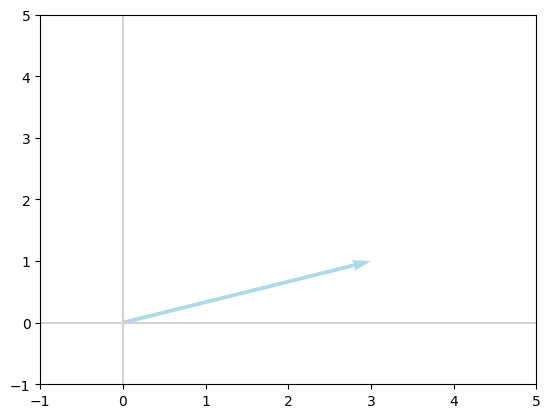

In [54]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [55]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [56]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [57]:
v == Iv

array([ True,  True])

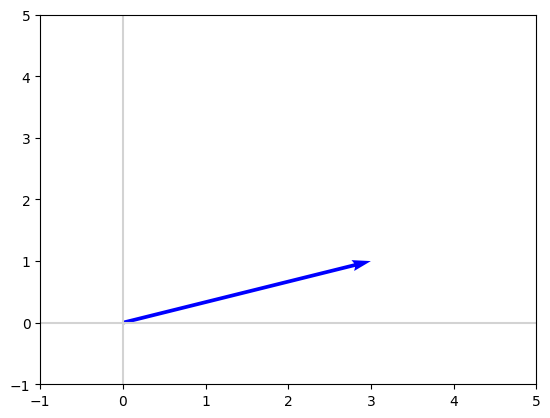

In [58]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

# so nothing changed by mutiplying an identity matrix with a vector

In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis:

In [59]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [60]:
Ev = np.dot(E, v)
Ev # now the vector has changed

array([ 3, -1])

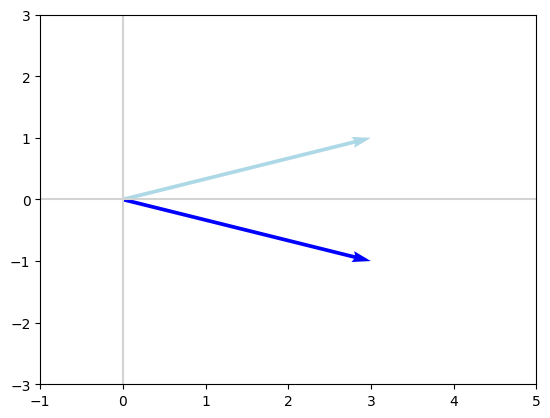

In [61]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)
# you see that there are two differents vectors now. EV is now pointing on the negative y axis

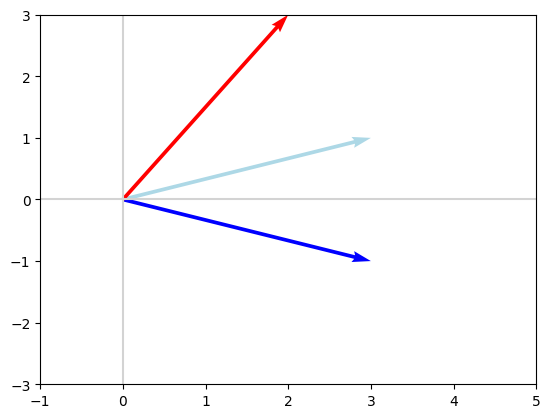

In [62]:
# It is even possible to represent more than 3 vectors on a same axis
plot_vectors([v, Ev , np.array([2,3])], ['lightblue', 'blue' , 'red'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis:

In [63]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [64]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

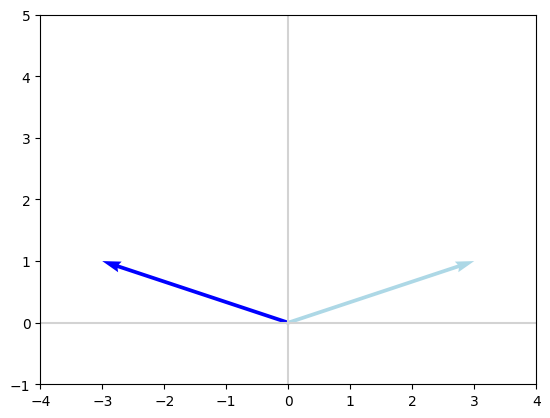

In [65]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

(-10.0, 10.0)

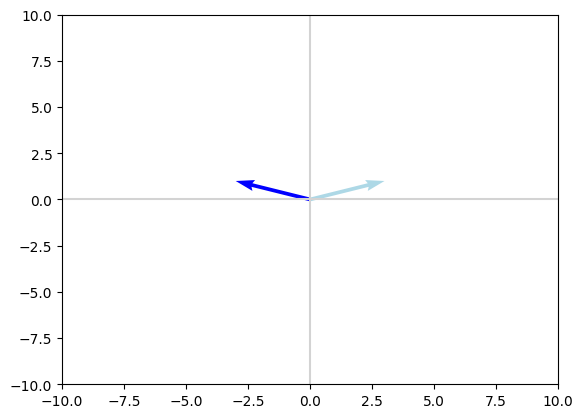

In [66]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-10,10)
plt.ylim(-10,10)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation*

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$:

In [67]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [68]:
Av = np.dot(A, v)
Av

array([1, 4])

(-5.0, 5.0)

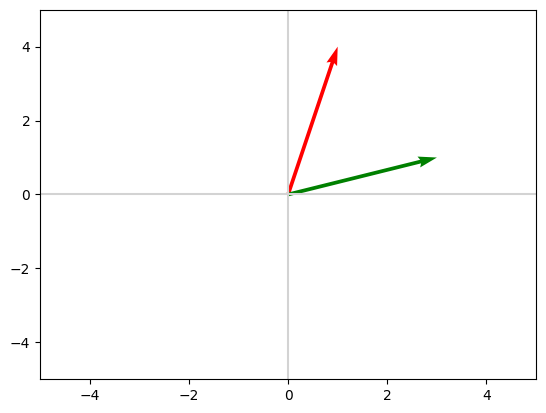

In [69]:
plot_vectors([Av , v] , ["red", "green"])
plt.xlim(-5,5)
plt.ylim(-5,5)

# applying A to v changed the direction of v by a certain angle

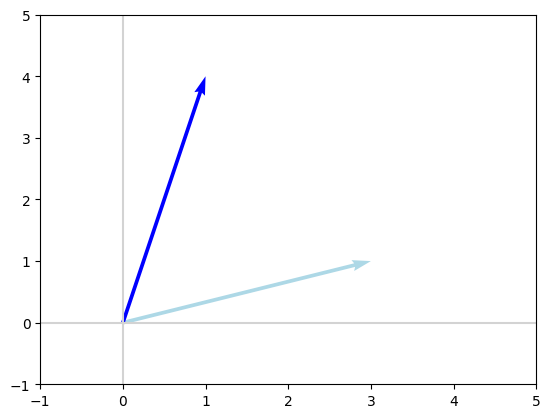

In [70]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

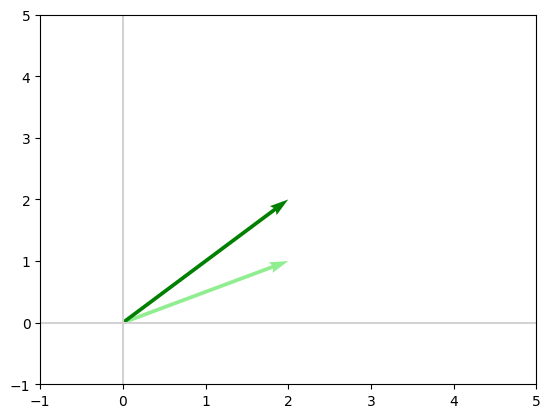

In [71]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector):

In [72]:
v
v.shape

(2,)

In [73]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [74]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [75]:
# we now have 4 differents vectors that we can concatenate to form a matrix with many dimension
# we convert each vector into into a vertical vector
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [76]:
IV = np.dot(I, V)
IV  # no impact

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [77]:
AV = np.dot(A, V)
AV  # applying now the matrix A to the V matrix now changed all the vectors = [Av1 , Av2 , Av3 , Av4]

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [78]:
# function to convert a row vector into a 1d column vector
def conv_vector_1d(v):
  v = np.array([v]).T
  return v
conv_vector_1d(v)


array([[3],
       [1]])

In [79]:
# function to convert column of matrix to 1D vector:
def mat_colum_to_vector(matrix , column):
  #v = np.array(matrix[:, column])
  v = np.array(matrix[:, column])
  v.shape = (v.shape[0], )

  return v

mat_colum_to_vector(V , 0)

array([3, 1])

In [80]:
# or use from the prof much simplier function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

vectorfy(V, 0)

array([3, 1])

In [81]:
mat_colum_to_vector(V , 0) == vectorfy(V, 0)

array([ True,  True])

In [82]:
p = np.array([[3,5]]).T
print(p)
p = p.reshape(-1)
p

[[3]
 [5]]


array([3, 5])

In [83]:
vectorfy(V, 0) == v

array([ True,  True])

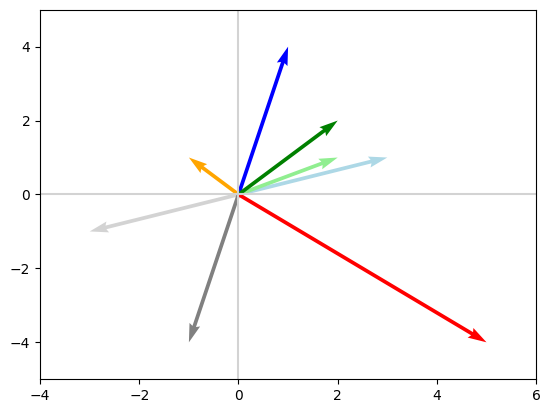

In [84]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues...

**Return to slides here.**

### Eigenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied:

$Av = \lambda v$

Easiest way to understand this is to work through an example:

In [85]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of:

* a vector of eigenvalues
* a matrix of eigenvectors

In [86]:
lambdas, V = np.linalg.eig(A)


The matrix contains as many eigenvectors as there are columns of A:

In [87]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [88]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector:

In [89]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [90]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

np.float64(1.3722813232690143)

In [91]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [92]:
lambduh * v

array([1.18031462, 0.70000958])

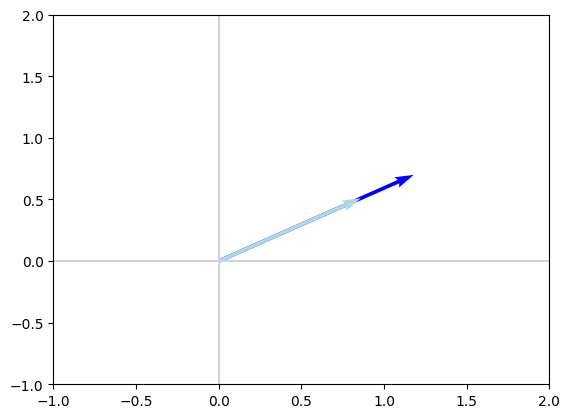

In [93]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [94]:
#Both vectors Av and v have the same direction. the only thing that change is the lenght of the vector

And again for the second eigenvector of A:

In [95]:
v2 = V[:,1]
v2
np.dot(A,v) == lambdas[0]*v
np.dot(A,v2) == lambdas[1]*v2

array([ True,  True])

In [96]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [97]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [98]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

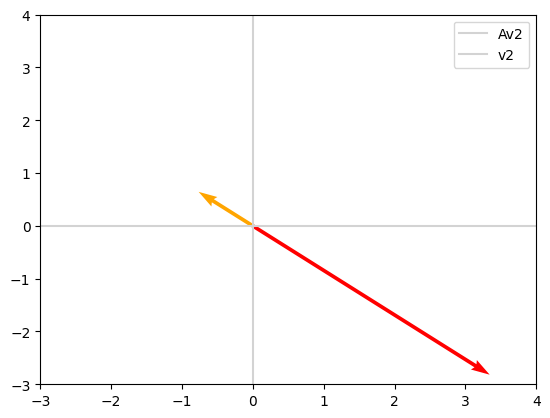

In [99]:
plot_vectors([Av2, v2] , ["red" , "orange"])
plt.xlim(-3 ,4)
plt.ylim(-3 ,4)
plt.legend(["Av2" , "v2"])

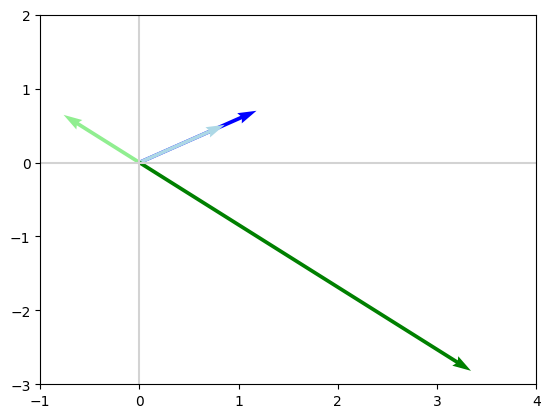

In [100]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same:

In [101]:
A_p = torch.tensor([[4,5,5. ], [5,6,8] , [57,6,48]])
print(A_p)
lambdass , VECTORS  = torch.linalg.eig(A_p)
print(lambdass)
print(VECTORS)

# we notice that our eigenvalues and vectors are complex tensors so let convert them into float

tensor([[ 4.,  5.,  5.],
        [ 5.,  6.,  8.],
        [57.,  6., 48.]])
tensor([55.5263+0.0000j,  1.2369+2.6673j,  1.2369-2.6673j])
tensor([[-0.1115+0.0000j, -0.5098+0.0640j, -0.5098-0.0640j],
        [-0.1694+0.0000j, -0.4289-0.3073j, -0.4289+0.3073j],
        [-0.9792+0.0000j,  0.6765+0.0000j,  0.6765-0.0000j]])


In [102]:
lambdass , VECTORS  = lambdass.float() , VECTORS.float()
print(lambdass)
print(VECTORS)

tensor([55.5263,  1.2369,  1.2369])
tensor([[-0.1115, -0.5098, -0.5098],
        [-0.1694, -0.4289, -0.4289],
        [-0.9792,  0.6765,  0.6765]])


/tmp/ipython-input-1746686562.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /pytorch/aten/src/ATen/native/Copy.cpp:309.)
  lambdass , VECTORS  = lambdass.float() , VECTORS.float()


In [103]:
torch.matmul(A_p , VECTORS[:,0])

tensor([ -6.1891,  -9.4076, -54.3724])

In [104]:
lambdass[0]*VECTORS[:,0]

tensor([ -6.1891,  -9.4076, -54.3725])

In [105]:
# why?
print(torch.matmul(A_p , VECTORS[:,0])  == lambdass[0]*VECTORS[:,0])

tensor([False, False, False])


In [106]:
#obtenir uniquement les parties relles ou imaginaires de mon tensor complex et convertir en float
torch.tensor([-0.1115+0.0000j, -0.5098+0.0640j, -0.5098-0.0640j]).imag.float()
#torch.tensor([-0.1115+0.0000j, -0.5098+0.0640j, -0.5098-0.0640j]).imag.float()

tensor([ 0.0000,  0.0640, -0.0640])

In [107]:
# exemple du prof John Krohn
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [108]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [109]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [110]:
V_p = V_cplx.float()
V_p

tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [111]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [112]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [113]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [114]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [115]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [116]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [117]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [118]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [119]:
Av2_p = torch.matmul(A_p.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [120]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

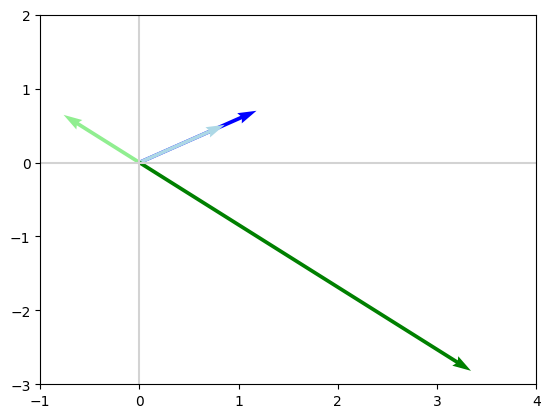

In [121]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [122]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [123]:
lambdas_X, V_X = np.linalg.eig(X)

In [124]:
V_X # one eigenvector per column of X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [125]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([29.67623202, 20.62117365, -0.29740567])

Confirm $Xv = \lambda v$ for an example eigenvector:

In [126]:
v_X = V_X[:,0]
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [127]:
lambda_X = lambdas_X[0]
lambda_X

np.float64(29.676232023948902)

In [128]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [129]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [130]:
X_pt = torch.tensor(X , dtype= torch.float32)
print(X_pt)

lambas_pt , vectors_pt = torch.linalg.eig(X_pt)
lambas_pt , vectors_pt = lambas_pt.float() , vectors_pt.float()


lambas_pt_1 = lambas_pt[0]
vectors_pt_1 = vectors_pt[:,0]



print(lambas_pt_1 )
print("float  first vector is : ", vectors_pt_1 )

print(torch.matmul(X_pt,vectors_pt_1))
print(np.dot(lambas_pt_1,vectors_pt_1))

print(torch.matmul(X_pt,vectors_pt_1) == np.dot(lambas_pt_1,vectors_pt_1))

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])
tensor(29.6762)
float  first vector is :  tensor([0.7118, 0.6665, 0.2217])
tensor([21.1223, 19.7798,  6.5792])
[21.122288  19.779833   6.5792203]
tensor([False,  True, False])


/tmp/ipython-input-4186059125.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  print(np.dot(lambas_pt_1,vectors_pt_1))
/tmp/ipython-input-4186059125.py:19: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  print(torch.matmul(X_pt,vectors_pt_1) == np.dot(lambas_pt_1,vectors_pt_1))


(-5.0, 30.0)

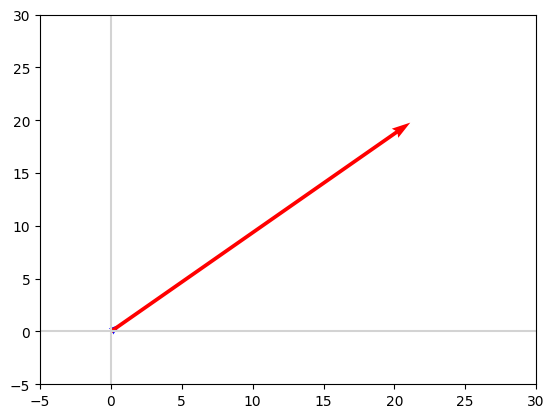

In [131]:
plot_vectors([vectors_pt_1, torch.matmul(X_pt,vectors_pt_1)] , ["blue" , "red"])
plt.xlim(-5,30)
plt.ylim(-5,30)

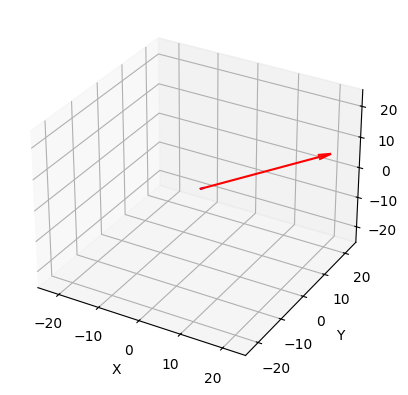

In [132]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_vectors_3d(vectors, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(vectors)):
        vec = vectors[i]
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=colors[i], arrow_length_ratio=0.1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Automatically adjust limits based on vector magnitudes
    max_val = np.max(np.abs(vectors))
    ax.set_xlim([-max_val * 1.2, max_val * 1.2])
    ax.set_ylim([-max_val * 1.2, max_val * 1.2])
    ax.set_zlim([-max_val * 1.2, max_val * 1.2])
    plt.show()

# Example usage with a 3D vector
v_3d = np.array([3, 1, 2])
plot_vectors_3d([vectors_pt_1, torch.matmul(X_pt,vectors_pt_1)] , ["blue" , "red"])
# we can see te initial vector because its coordinate are close to 0 in each axis. , multiply by 10 forexamle to see


You can also plot multiple 3D vectors, for example:


**Return to slides here.**

### 2x2 Matrix Determinants

In [133]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [134]:
np.linalg.det(X)   # determinent of a metrix

np.float64(-2.0000000000000013)

**Return to slides here.**

In [135]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [136]:
np.linalg.det(N)


np.float64(0.0)

In [137]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [138]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [139]:
torch.det(N)

tensor(-0.)

In [140]:
#  Arnelle code
N_pt = torch.tensor(N , dtype = torch.float32)
print(torch.det(N_pt))
#print(torch.linalg.inv(N_pt))  #  linalg.inv: The diagonal element 2 is zero, the inversion could not be completed because the input matrix is singular.


tensor(-0.)


/tmp/ipython-input-2080269914.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  N_pt = torch.tensor(N , dtype = torch.float32)


**Return to slides here.**

### Generalizing Determinants for matrices larger than 2*2

In [141]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [142]:
np.linalg.det(X)

np.float64(19.999999999999996)

**Return to slides here.**

### Determinants & Eigenvalues

In [143]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [144]:
np.prod(lambdas)

np.float64(19.99999999999999)

**Return to slides here.**

Here's $|\text{det}(X)|$ in NumPy:

In [145]:
np.abs(np.linalg.det(X))

np.float64(19.999999999999996)

Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values:

In [146]:
B = np.array([[1, 0], [0, 1]])
print(B)
print(np.linalg.det(B))

[[1 0]
 [0 1]]
1.0


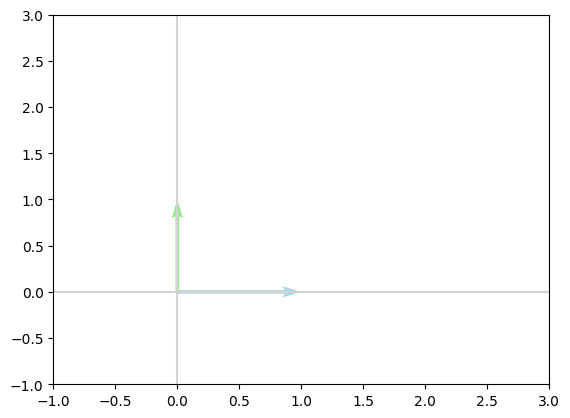

In [147]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

Let's start by applying the matrix $N$ to $B$, recalling from earlier that $N$ is singular:

In [148]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [149]:
np.linalg.det(N)

np.float32(0.0)

In [150]:
NB = np.dot(N, B)
print(NB)

[[-4.  1.]
 [-8.  2.]]


/tmp/ipython-input-2114596257.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  NB = np.dot(N, B)


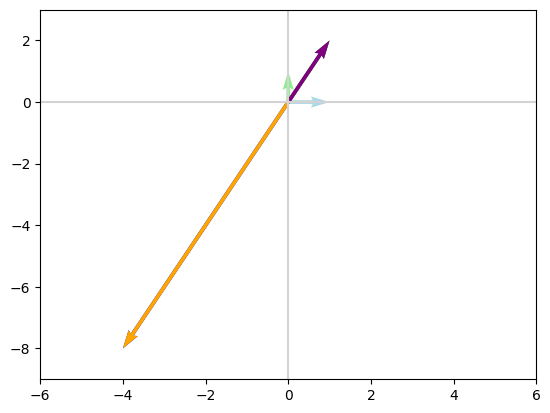

In [151]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1) ,  vectorfy(N, 0), vectorfy(N, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'   , 'orange', 'purple'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [152]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.

Now let's try applying $I_2$ to $B$:

In [153]:
I

array([[1, 0],
       [0, 1]])

In [154]:
np.linalg.det(I)

np.float64(1.0)

In [155]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

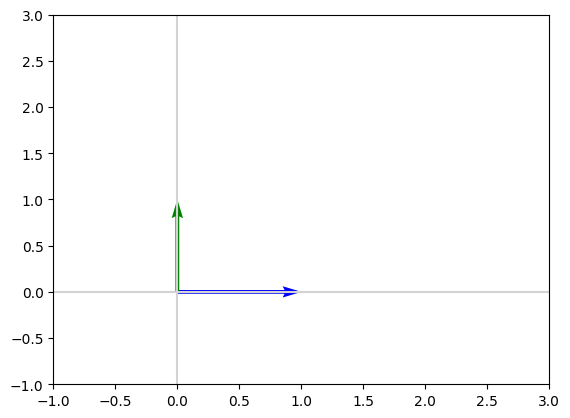

In [156]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [157]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix $J$ which is more interesting:

In [158]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [159]:
np.linalg.det(J)

np.float64(-1.0)

In [160]:
np.abs(np.linalg.det(J))

np.float64(1.0)

In [161]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

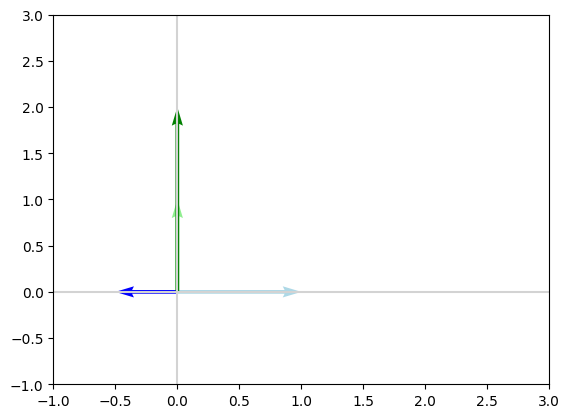

In [162]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [163]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix $D$, which scales vectors by doubling along both the $x$ and $y$ axes:

In [164]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [165]:
np.linalg.det(D)

np.float64(4.0)

In [166]:
DB = np.dot(D, B)
DB


array([[2, 0],
       [0, 2]])

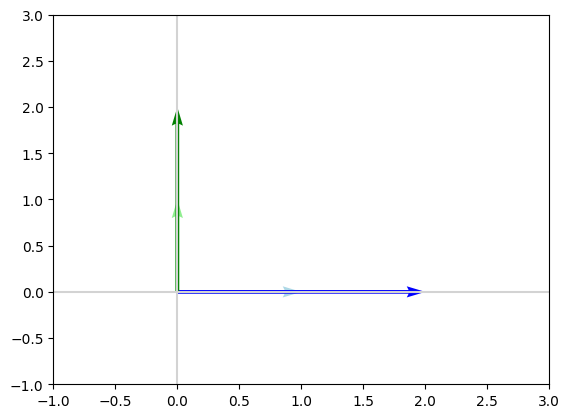

In [167]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [168]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

**Return to slides here.**

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is

$A = V \Lambda V^{-1}$

Where:

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [169]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [170]:
# Arnelle part in one shotn
Lambdas , Vectors = np.linalg.eig(A)
print ("eigenvalues are" , Lambdas)

print ("                       ")

print ("eigenvectors are" , Vectors)
print ("                       ")


print("the eigenvalues of the matrix of eigenvectors are " , np.linalg.eig(Vectors)[0]) # none of them are zero
# Vectors matrix can be inverted
print ("                       ")

Vectors_inverse = np.linalg.inv(Vectors)
print("inverse matrix of eingenvectors matrix is" , Vectors_inverse)
print ("                       ")

diag_matrix_of_Lambdas = np.diag(Lambdas)
print("diag_matrix_of_Lambdas is", diag_matrix_of_Lambdas)
print ("                       ")

print("matrist A ist" , A )
print ("                       ")

print("eigendecomposition of A ist", np.dot(Vectors , np.dot(diag_matrix_of_Lambdas ,Vectors_inverse )))



eigenvalues are [ 2. -1.]
                       
eigenvectors are [[ 0.70710678 -0.37139068]
 [-0.70710678  0.92847669]]
                       
the eigenvalues of the matrix of eigenvectors are  [0.29351698 1.3420665 ]
                       
inverse matrix of eingenvectors matrix is [[2.3570226  0.94280904]
 [1.79505494 1.79505494]]
                       
diag_matrix_of_Lambdas is [[ 2.  0.]
 [ 0. -1.]]
                       
matrist A ist [[ 4  2]
 [-5 -3]]
                       
eigendecomposition of A ist [[ 4.  2.]
 [-5. -3.]]


In [171]:
lambdas, V = np.linalg.eig(A)

In [172]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [173]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [174]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$:

In [175]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers.

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix.

In [176]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [177]:
lambdas, Q = np.linalg.eig(A)

In [178]:
lambdas

array([3., 1.])

In [179]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [180]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$:

In [181]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [182]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [183]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [184]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [185]:
# Arnelle part in one
Lambdas , Vectors = torch.linalg.eig(P)
print ("eigenvalues are" , Lambdas)

print ("                       ")

print ("eigenvectors are" , Vectors)
print ("                       ")


print("the eigenvalues of the matrix of eigenvectors are " , torch.linalg.eig(Vectors)[0]) # none of them are zero
# Vectors matrix can be inverted
print ("                       ")

Vectors_inverse = torch.linalg.inv(Vectors)
print("inverse matrix of eingenvectors matrix is" , Vectors_inverse)
print ("                       ")

diag_matrix_of_Lambdas = torch.diag(Lambdas)
print("diag_matrix_of_Lambdas is", diag_matrix_of_Lambdas)
print ("                       ")

print("matrist P ist" ,  P)
print ("                       ")

print("eigendecomposition of P ist", np.dot(Vectors , np.dot(diag_matrix_of_Lambdas ,Vectors_inverse )))



eigenvalues are tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])
                       
eigenvectors are tensor([[ 0.9511+0.j, -0.2386+0.j,  0.1626+0.j],
        [ 0.1218+0.j, -0.1924+0.j, -0.7705+0.j],
        [ 0.2837+0.j, -0.9519+0.j,  0.6163+0.j]])
                       
the eigenvalues of the matrix of eigenvectors are  tensor([-0.7199+0.j,  0.8130+0.j,  1.2819+0.j])
                       
inverse matrix of eingenvectors matrix is tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914-0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817-0.j, -1.1164-0.j,  0.2052-0.j]])
                       
diag_matrix_of_Lambdas is tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])
                       
matrist P ist tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])
                       
eigendecomposition of P ist [[24.999989 +0.j  1.9999982+0.j -4.999999 +0.j

/tmp/ipython-input-1613925640.py:26: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  print("eigendecomposition of P ist", np.dot(Vectors , np.dot(diag_matrix_of_Lambdas ,Vectors_inverse )))


In [186]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
print(S)

print("           ")

print("S is symetric because:  S*(S^T) = (S^T)*S" ,  tensor.matmul(S , S.T) == tensor.matmul(S.T , S) )

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])
           


NameError: name 'tensor' is not defined

In [ ]:
# Arnelle part in one
Lambdas , Q = torch.linalg.eig(S)
print ("eigenvalues are" , Lambdas)

print ("                       ")

print ("orthogonal eigenvectors matix  ist " , Q)
print ("                       ")


print("the eigenvalues of the matrix of eigenvectors are " , torch.linalg.eig(Q)[0]) # none of them are zero
# Vectors matrix can be inverted
print ("                       ")

Q_transpose =(Q.real).T
print("transpose matrix of orthogonal eingenvectors matrix is" , Q_transpose)
print ("                       ")

diag_matrix_of_Lambdas = torch.diag(Lambdas.real)
print("diag_matrix_of_Lambdas is", diag_matrix_of_Lambdas)
print ("                       ")

print("matrist S ist" ,  S)
print ("                       ")

print("eigendecomposition of S ist", np.dot(Q.real , np.dot(diag_matrix_of_Lambdas ,Q_transpose )))



**Return to slides here.**

## Segment 3: Matrix Operations for ML

### Singular Value Decomposition (SVD)

As on slides, SVD of matrix $A$ is:

$A = UDV^T$

Where:

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [ ]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
print(A)

vectors ,lambdas = np.linalg.eig(A)
print(vectors)   # Last 2 dimensions of the array must be square . it is the reason why we use SVD singular value decomposition

In [ ]:
U, d, VT = np.linalg.svd(A) # V is already transposed



In [ ]:
U

In [ ]:
VT
VT

In [ ]:
V = VT.T
V

In [ ]:
d

In [ ]:
np.diag(d)

$D$ must have the same dimensions as $A$ for $UDV^T$ matrix multiplication to be possible:

In [ ]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

In [ ]:
np.dot(U, np.dot(D, VT))

SVD and eigendecomposition are closely related to each other:

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true.

In [ ]:
# EXERCICE/ singular value decomposition of P

print("P",  P)

U_pt , D_pt , VT_pt  = torch.linalg.svd(P)
print("U_pt",U_pt)
print("D_pt" , D_pt)
print("VT_pt",  VT_pt)   # the resulte given by SVD is VT. to obtain the right singular vectors , use V

D_pt_matrix = torch.diag(D_pt)

print("D_pt_matrix"  , D_pt_matrix)

print( "SVD von P ist " , torch.matmul(U_pt , torch.matmul(D_pt_matrix , VT_pt)))

In [ ]:
# let demonstrate the left and right singular vectors
Ptranspose =  P.T
print("P.T ist :\n"  , Ptranspose  )
print("                                                      ")

P_Ptranspose = torch.matmul(P, Ptranspose)
print("P*(P_T) ist : \n"  , P_Ptranspose  )
print("                                                      ")

Ptranspose_P = torch.matmul(Ptranspose , P)
print("(P_T)*P ist :\n"  , Ptranspose_P  )
print("                                                      ")

print(" left singular vecors from P are U_pt vectors\n"  , U_pt  , "          \nthey are the eigenvectors from the matrix P*(P_T)  that are\n" , torch.linalg.eig(P_Ptranspose)[1] )
print("                                                      ")

print(" right singular vecors from P are V_pt (not VT_pt!! V_pt = (VT_pt).T ) vectors\n"  , VT_pt.T  , "\nthey are the eigenvectors from the matrix (P_T)*P  that are\n" , torch.linalg.eig(Ptranspose_P)[1]  , "\nV  is an orthogonal  n×n  matrix; its columns are the right-singular vectors of  A ." )
print("                                                      ")

print("  singular values from P are D_pt elements D_pt\n"   , D_pt,  "\nthey are the squarred roots from  the eigenvalues of  the matrix (P_T)*P  or P*(P_T) that are\n" , (torch.linalg.eig(Ptranspose_P)[0])**(1/2) )

### Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [ ]:
from PIL import Image

Fetch photo of Oboe, a terrier, with the book *Deep Learning Illustrated*:

In [ ]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

# il télécharge une image nommée oboe-with-book.jpg depuis un dépôt GitHub. Le ! au début de la ligne indique qu'il s'agit d'une commande shell exécutée dans le notebook.

In [ ]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

#La ligne img = Image.open('oboe-with-book.jpg') utilise la bibliothèque Pillow pour charger le fichier image dans une variable nommée img. Ensuite, la ligne _ = plt.imshow(img) utilise Matplotlib pour afficher cette image dans le notebook.

In [ ]:
print(img.size)



Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:

In [ ]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

In [ ]:
imggray.size  # same size, only the RGB colours code  changed

Convert data into numpy matrix, which doesn't impact image data:

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')


"""
Ce bloc de code convertit l'image en niveaux de gris en une matrice NumPy et l'affiche. Premièrement,
 imgmat = np.array(list(imggray.getdata(band=0)), float) extrait les données de pixels de l'image en niveaux
 de gris (imggray), les convertit en une liste, puis en un tableau NumPy de type float. band=0 indique qu'il
 s'agit du premier (et unique) canal de l'image en niveaux de gris.
 Ensuite, imgmat.shape = (imggray.size[1], imggray.size[0]) remodèle ce tableau 1D en une matrice 2D avec les
  dimensions correctes (hauteur, largeur) de l'image. Puis, imgmat = np.matrix(imgmat) le convertit en un objet
   matrice NumPy. Enfin, _ = plt.imshow(imgmat, cmap='gray') affiche cette matrice comme une image en niveaux de gris.
"""

In [ ]:
print(imgmat.shape)

print(imgmat[0,0])

print(imgmat.size)

Calculate SVD of the image:

In [ ]:
#U, sigma, V = np.linalg.svd(imgmat)

In [ ]:
U

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image:

Voici une explication pour clarifier pourquoi on utilise la première colonne de $$U$$, la première valeur singulière $$\sigma_1$$, et la première ligne de $$V$$ dans la SVD :

- La décomposition en valeurs singulières (SVD) d’une matrice $$A$$ s’écrit :
  $$
  A = U \Sigma V^T
  $$
  où :
  - $$U$$ contient les **vecteurs singuliers gauches** (colonnes orthonormées),
  - $$V$$ contient les **vecteurs singuliers droits** (colonnes orthonormées),
  - $$\Sigma$$ est une matrice diagonale avec les **valeurs singulières $$\sigma_i$$**, ordonnées de la plus grande à la plus petite.

- Chaque $$\sigma_i$$ indique l'importance de la composante correspondante dans la décomposition, donc $$\sigma_1$$ est la **plus grande valeur singulière**, qui représente la partie la plus significative ou dominante de $$A$$.

- Mathématiquement, la matrice peut être exprimée comme une somme de matrices de rang 1 :
  $$
  A = \sum_{i=1}^r \sigma_i u_i v_i^T
  $$
  où $$u_i$$ est la $$i$$-ième colonne de $$U$$ et $$v_i^T$$ est la $$i$$-ième ligne de $$V^T$$.

- Lorsque tu prends uniquement la première colonne de $$U$$, la première valeur singulière $$\sigma_1$$, et la première ligne de $$V$$, tu reconstruis la **meilleure approximation de rang 1** de la matrice $$A$$ qui capture la plus grande partie de sa structure (ou information).

### Pourquoi c’est correct ?

- $$u_1$$ est le vecteur singulier gauche associé à $$\sigma_1$$, $$v_1$$ est le vecteur singulier droit associé,
- Leur produit pondéré $$\sigma_1 u_1 v_1^T$$ donne la composante principale ou la caractéristique dominante de la matrice,
- D’où l’intérêt de les utiliser pour les calculs de compression ou d’approximation d’image.

En résumé, on choisit la première colonne de $$U$$ et la première ligne de $$V$$ car elles correspondent à la **composante la plus "prominente"** (ou la plus informative) de la matrice, identifiée par la valeur singulière la plus élevée $$\sigma_1$$.

In [ ]:
print(U[:, :1])  # first column = first eigenvector of  imgmat*(imgmat.T)
print("                             ")
print(V[:1, :])  # first row = first eigenvector of  imgmat*(imgmat.T)
print("                             ")

print(sigma[:1])  # first eigenvalues from  imgmat*(imgmat.T) squarred
print("                             ")



In [ ]:
#  why does the prof takes the first row of V which is the matrix containing the right singular vectors ?
# Because this V is already transpose . so the colums become rows and rows columns like in this short example

L = np.array([[7,8,5,6] , [70,80,50,60] , [71,81,51,61]  , [72,82,52,62]])


print("L\n"  , L)

print("L.T\n"  , L.T)

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

#This are the prominent (important ) feature selection that gives us a compressed imaage. The vectors are ordered from most important to less important
# This image gives us the maximum compression possible

In [ ]:
svd1_rep = 1*4032 + 1 + 1*3024  # 1 first left and rigt singular vectors and values
svd1_rep
 # 7057 pixels

Additional singular vectors improve the image quality:

In [ ]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [ ]:
imgmat.shape

In [ ]:
full_representation = 4032*3024
full_representation  #more than 12 million pixels

In [ ]:
svd64_rep = 64*4032 + 64 + 64*3024  # 64 first left and rigt singular vectors and values
svd64_rep    # in contrast the compressed image has 451.648 pixels (450 thousand)

In [ ]:
svd64_rep/full_representation

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files like music , videos ...

**Return to slides here.**

### The Moore-Penrose Pseudoinverse

Let's calculate the pseudoinverse $A^+$ of some matrix $A$ using the formula from the slides:

$A^+ = VD^+U^T$

In [190]:
A= np.array([[-1, 2],[3, -2], [5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

As shown earlier, the NumPy SVD method returns $U$, $d$, and $V^T$:

In [191]:
U, d, VT = np.linalg.svd(A)

In [192]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [193]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [196]:
d



array([8.66918448, 4.10429538])

To create $D^+$, we first invert the non-zero values of $d$:

In [197]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [198]:
1/8.669

0.11535355865728457

In [199]:
1/4.104

0.24366471734892786

...and then we would take the tranpose of the resulting matrix.

Because $D$ is a diagonal matrix, this can, however, be done in a single step by inverting $D$:

In [204]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [ ]:


  (1/(8.669*4.10429538))*D
# to compute the inverse of D, we calculate  [1/(det(D))]*Di
# with Di = np.array([[d,-b] , [-c , a]]) if D =np.array([[a,b] , [c , d]])

In [206]:
print(A.shape)
print((A.T).shape)

print(Dinv.shape)

(3, 2)
(2, 3)
(2, 2)


$D^+$ must have the same dimensions as $A^T$ in order for $VD^+U^T$ matrix multiplication to be possible:

In [209]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

(Recall $D$ must have the same dimensions as $A$ for SVD's $UDV^T$, but for MPP $U$ and $V$ have swapped sides around the diagonal matrix.)

Now we have everything we need to calculate $A^+$ with $VD^+U^T$:

In [210]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method `pinv()`:

In [211]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [21]:
import numpy as np

# Exemple de matrice A (non carrée ou singulière)
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# Calcul de la SVD
U, sigma, VT = np.linalg.svd(A)

# sigma est un vecteur des valeurs singulières (diagonale de Sigma)
print("Valeurs singulières:", sigma)

# Construire la matrice diagonale inverse des valeurs singulières pour le pseudoinverse
# on inverse chaque sigma_i non nul, on met à zéro celles trop proches de zéro (tolérance)
tolerance = 1e-10
sigma_inv = np.array([1/s if s > tolerance else 0 for s in sigma])

# Construire Sigma inverse carrée (matrice diagonale rectangulaire)
Sigma_inv = np.zeros((VT.shape[0], U.shape[1]))
np.fill_diagonal(Sigma_inv, sigma_inv)

print( "Sigma_inv\n",Sigma_inv)

# Calcul du pseudoinverse Moore-Penrose
A_pinv = VT.T @ Sigma_inv @ U.T

print("Pseudoinverse de A :\n", A_pinv)

# Vérification : A*A_pinv*A ≈ A
print("Vérification A*A_pinv*A ≈ A :\n", A @ A_pinv @ A)


Valeurs singulières: [9.52551809 0.51430058]
Sigma_inv
 [[0.10498117 0.         0.        ]
 [0.         1.94438824 0.        ]]
Pseudoinverse de A :
 [[-1.33333333 -0.33333333  0.66666667]
 [ 1.08333333  0.33333333 -0.41666667]]
Vérification A*A_pinv*A ≈ A :
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


Explications :
Le pseudoinverse
A
+
A
+
  est défini par :

A
+
=
V
Σ
+
U
T
A
+
 =VΣ
+
 U
T

où
Σ
+
Σ
+
  est la matrice diagonale avec l’inverse des valeurs singulières (sauf celles nulles ou proches de zéro qui restent à zéro pour la stabilité numérique).

On effectue la décomposition SVD pour connaître
U
,
Σ
,
V
T
U,Σ,V
T
 ,

On inverse sélectivement les valeurs singulières dans
Σ
Σ,

On reconstruit le pseudoinverse avec la formule ci-dessus, en utilisant
V
V,
Σ
+
Σ
+
  et
U
U,

Ce pseudoinverse est utile pour résoudre des systèmes linéaires même lorsque la matrice n’est pas carrée ou singulière.

Cette méthode exploite pleinement la SVD pour une inversion généralisée stable, même dans des cas où la matrice
A
A est rectangulaire ou mal conditionnée

**Exercise**

Use the `torch.svd()` method to calculate the pseudoinverse of `A_p`, confirming that your result matches the output of `torch.pinverse(A_p)`:

In [34]:
import torch
import numpy as np
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])

print("A_p  is:\n" ,  A_p)
print("                                ")

# Let first get he singular values and vectors of A_p
U_A , D_A , VT_A = torch.linalg.svd(A_p)

print("U_A  is:\n" ,  U_A)
print("                                ")

print("D_A  is:\n" ,  D_A)
print("                                ")

print("VT_A  is:\n" ,  VT_A)
print("                                ")

print("now that we have the singular vectors and values of A_p , we can generate D_A_plus which is the matrix containing the inverse elemenent of D_A on it's diagonal\n with N_row(D_A_plus) = N_row(VT_A)  and N_col(D_A_plus) = N_col(U_A)")
print("                                ")


fictive_matrix = torch.zeros([VT_A.shape[0], U_A.shape[1]])

print("fictive_matrix with D_A_plus number of rows and colums  is:\n" ,  fictive_matrix)
print("                                ")

D_A_matrix_inverse = torch.linalg.inv(torch.diag(D_A))
print(" iverse diagonale matrix of D_A ist  D_A_matrix_inverse \n"  , D_A_matrix_inverse)

print("                                ")
print("The size does not fit. So we replace our  fictive matrix  columns (exept the last column) with the columns of  D_A_matrix_inverse to have the same dimension")


fictive_matrix[: ,:-1] = D_A_matrix_inverse


fictive_matrix

D_A_plus = fictive_matrix

print("D_A_plus ist \n" , D_A_plus )

print("                                ")


print("Now let check the result of The pseudoinverse of A_p cause we have all the elements")

A_p_PLUS = torch.matmul(VT_A.T ,  torch.matmul(D_A_plus, U_A.T) )

print('A_p_PLUS result is \n'  ,  A_p_PLUS)

print(' And the torch formula gives us the answer  torch.linalg.pinverse(A_p)  is \n'  ,   torch.pinverse(A_p))



A_p  is:
 tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])
                                
U_A  is:
 tensor([[ 0.1271,  0.4741,  0.8713],
        [ 0.0016, -0.8785,  0.4778],
        [ 0.9919, -0.0593, -0.1124]])
                                
D_A  is:
 tensor([8.6692, 4.1043])
                                
VT_A  is:
 tensor([[ 0.5580,  0.8298],
        [-0.8298,  0.5580]])
                                
now that we have the singular vectors and values of A_p , we can generate D_A_plus which is the matrix containing the inverse elemenent of D_A on it's diagonal
 with N_row(D_A_plus) = N_row(VT_A)  and N_col(D_A_plus) = N_col(U_A)
                                
fictive_matrix with D_A_plus number of rows and colums  is:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
                                
 iverse diagonale matrix of D_A ist  D_A_matrix_inverse 
 tensor([[0.1154, 0.0000],
        [0.0000, 0.2436]])
                                
The size does not fit. So 

In [24]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

**Return to slides here.**

Le pseudoinverse nous permet de resoudre des problemes de regression lineaire. W =X_inverse*Y with W: parameter vector , X_inverse: The inverse of the variables matrix and  Y: the targets vector. But in the reality, we always have more observations (rows) as variables(columns). So we can compute the inverse of X. In this case , we use the X_pinv (X_plus) to resolve the equation system.

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation.

We have eight data points ($n$ = 8):

In [1]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] # E.g.: Dosage of drug for treating Alzheimer's disease
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] # E.g.: Patient's "forgetfulness score"

In [2]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

Text(0.5, 1.0, 'Clinical Trial')

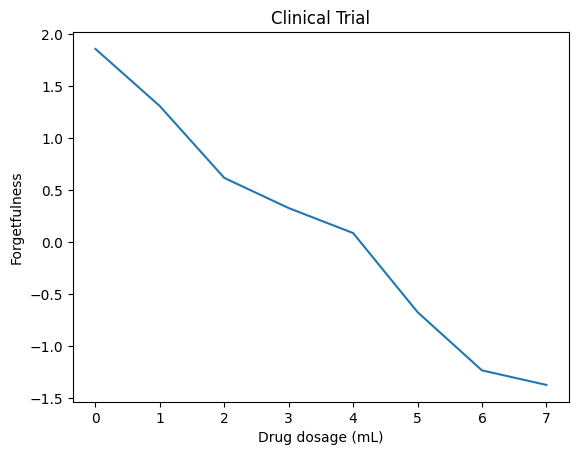

In [5]:
import matplotlib.pyplot as plt
plt.plot(x1 , y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

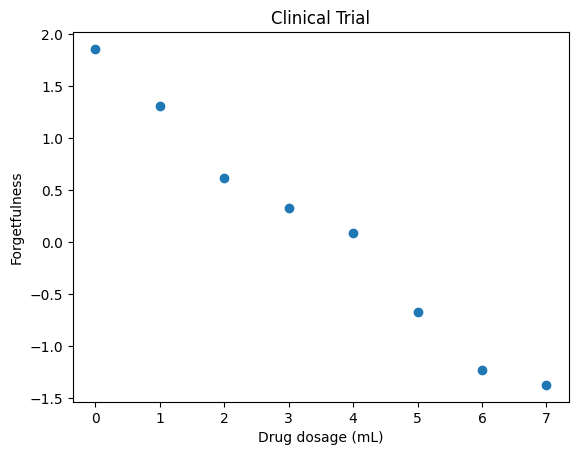

In [6]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [8]:
import numpy as np
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$:

In [13]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

matrix([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.]])

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$:

In [14]:
w = np.dot(np.linalg.pinv(X), y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$:

In [15]:
b = np.asarray(w).reshape(-1)[0]
b

np.float64(1.7599999999999985)

While the second weight corresponds to the slope of the line, which is typically denoted as $m$:

In [16]:
m = np.asarray(w).reshape(-1)[1]
m

np.float64(-0.4692857142857139)

With the weights we can plot the line to confirm it fits the points:

Ce code visualise la relation entre la variable x1 (la dose de médicament) et y (le score d'oubli) ainsi que la ligne de régression linéaire qui a été calculée. Il commence par créer une nouvelle figure et un système d'axes. Ensuite, il définit le titre et les étiquettes des axes. ax.scatter(x1, y) trace les points de données originaux. Puis, il calcule les coordonnées y (y_at_xmin, y_at_xmax) pour les limites x de la droite de régression, en utilisant la pente m et l'ordonnée à l'origine b que nous avons trouvées précédemment avec le pseudo-inverse. Enfin, ax.plot(...) trace cette droite de régression sur le même graphique que les points de données, en utilisant une couleur différente.

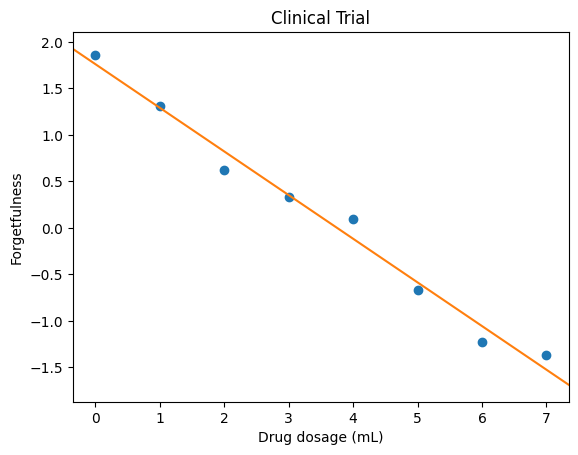

In [17]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

**DO NOT return to slides here. Onward!**

### The Trace Operator

Denoted as Tr($A$). Simply the sum of the diagonal elements of a matrix: $$\sum_i A_{i,i}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [ ]:
A = np.array([[25, 2], [5, 4]])
A

In [ ]:
25 + 4

In [ ]:
np.trace(A)

The trace operator has a number of useful properties that come in handy while rearranging linear algebra equations, e.g.:

* Tr($A$) = Tr($A^T$)
* Assuming the matrix shapes line up: Tr($ABC$) = Tr($CAB$) = Tr($BCA$)

In particular, the trace operator can provide a convenient way to calculate a matrix's Frobenius norm: $$||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$$

**Exercises**

With the matrix `A_p` provided below:

1. Use the PyTorch trace method to calculate the trace of `A_p`.
2. Use the PyTorch Frobenius norm method and the trace method to demonstrate that $||A||_F = \sqrt{\mathrm{Tr}(AA^\mathrm{T})}$

In [ ]:
import torch
# excercice 1
A_p = torch.tensor([[25, 2], [5, 4.]])
print("A_p ist : "  , A_p)

A_p_trace = torch.trace(A_p)



In [ ]:
# excercice 2

A_p_frobenius = torch.norm(A_p)

print("A_p_frobenius : "  , A_p_frobenius)

A_p_transpose = A_p.T

print("A_p_transpose : "  , A_p_transpose)

print(torch.trace(torch.matmul(A_p, A_p_transpose))**(1/2))


print(A_p_frobenius == (torch.trace(torch.matmul(A_p, A_p_transpose)))**(1/2))




In [ ]:
print((torch.trace(torch.matmul(A_p, A_p_transpose)))**(1/2))


**Return to slides here.**

### Principal Component Analysis

This PCA example code is adapted from [here](https://jupyter.brynmawr.edu/services/public/dblank/CS371%20Cognitive%20Science/2016-Fall/PCA.ipynb).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.data.shape

In [ ]:
iris.get("feature_names")

In [ ]:
iris.data[0:6,:]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X = pca.fit_transform(iris.data)

In [ ]:
X.shape

In [ ]:
X[0:6,:]

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [ ]:
iris.target.shape

In [ ]:
iris.target[0:6]

In [ ]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

In [ ]:
list(iris.target_names)

In [ ]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

**Return to slides here.**